# Generating figure 5 version 2

## setup

In [18]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse
from q_dms_ttr_paper.paths import DATA_PATH
from q_dms_ttr_paper.titration import normalize_data, normalized_hill_equation, compute_mg_1_2

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [2]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")

### style functions

In [26]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)

### plotting functions

In [22]:
def plot_mg_titration_fit(x, y, mg_1_2, n, max_val, ax=None, **kwargs):
    norm_data = -normalize_data(np.array(y)) + 1
    if ax is None:
        fig, ax = plt.subplots(1, 1, **kwargs)
    ax.scatter(x, norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 45, 0.25):
        y = normalized_hill_equation(j, mg_1_2, n, max_val)
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, lw=3)
    # plt.fill_between(xs, ys - r[1][0], ys + r[1][0], alpha=0.2, lw=0)
    # plt.ylim(-0.05, 1.1)
    return ax

## data info

In [3]:
df_wt_mg["df_type"] = "df_wt_mg"
df_wt_buff["df_type"] = "df_wt_buff"
df_mttr6_muts["df_type"] = "df_mttr6_muts"
df_all = pd.concat([df_wt_mg, df_wt_buff, df_mttr6_muts])
# print all unique combos between run_name and exp_name
df_all.groupby(['df_type', 'run_name', 'exp_name', 'name']).count()

sequence  \
df_type       run_name                                 exp_name                                       name                                      
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                 16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed          16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed        16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed               16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed              16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed        16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed        16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                     8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07_25_C0117_NaC_Hep_titra_CM_BL           minittr-6-2HP-ref                    12   
                                                       2022_07_26_C0117_KCl_Tris_titra_CM_BL          minittr-6-2HP-ref                    12   
df_wt_mg      2022_07_27_minittr_50mM_NaC_Mg_titra_seq 2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM        minittr-6-2HP-ref                    15   
              2022_07_28_minittr_0.1M_NaC_Mg_titra_seq 2022_07_28_C0117_100mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_07_29_minittr_0.15M_NaC_Mg_titr_seq 2022_07_29_C0117_150mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_09_minittr_0.2M_NaC_Mg_titra_seq 2022_08_08_C0117_200mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_10_minittr_0.25M_NaC_Mg_titr_seq 2022_08_09_C0117_250mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_11_minittr_0.3M_NaC_Mg_titra_seq 2022_08_10_C0117_300mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   

                                                                                                                                     structure  \
df_type       run_name                                 exp_name                                       name                                       
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                  16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed           16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed         16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed                16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed               16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed         16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed         16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                      8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07

In [10]:
df_h1_longer = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_h1_3bp_longer_fixed"]
df_h2_longer = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_h2_3bp_longer_fixed"]
df_h3_longer = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_h3_3bp_longer_fixed"]
df_wt = df_wt_mg[df_wt_mg["run_name"] == "2022_07_27_minittr_50mM_NaC_Mg_titra_seq"]


In [12]:
print([
    ["df_wt", len(df_wt)],
    ["df_h1_longer", len(df_h1_longer)],
    ["df_h2_longer", len(df_h2_longer)],
    ["df_h3_longer", len(df_h3_longer)],
])

[['df_wt', 15], ['df_h1_longer', 16], ['df_h2_longer', 16], ['df_h3_longer', 16]]


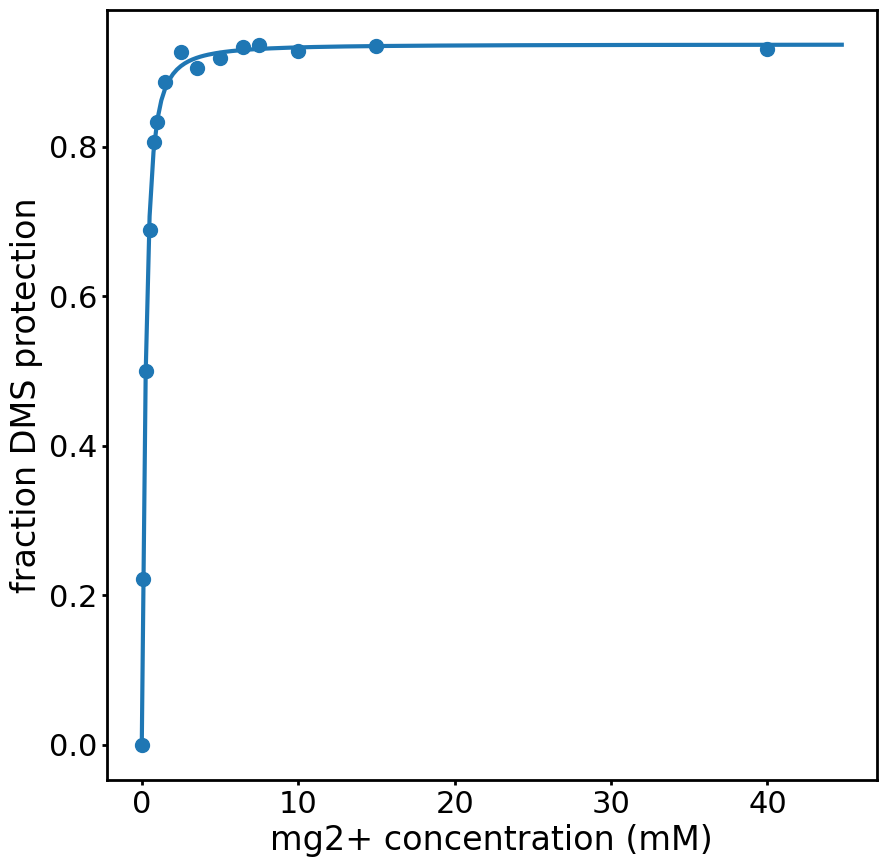

In [28]:
fig, ax = plt.subplots()
pfit, perr = compute_mg_1_2(df_wt["mg_conc"], df_wt["gaaa_avg"])
plot_mg_titration_fit(df_wt["mg_conc"], df_wt["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
#publication_titration_plot(df_wt, "50 mM", ax=ax)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)


[0.22922704 1.43749839 0.93747474]
[1.1078448  0.94709997 0.76763696]


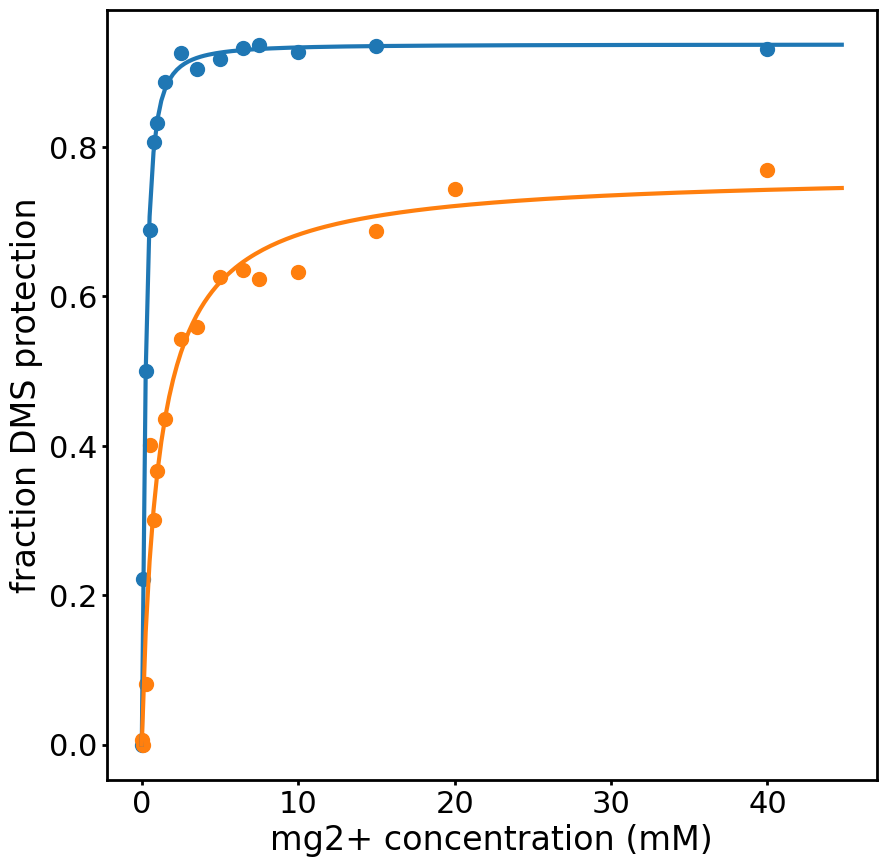

In [30]:
fig, ax = plt.subplots()
pfit, perr = compute_mg_1_2(df_wt["mg_conc"], df_wt["gaaa_avg"])
plot_mg_titration_fit(df_wt["mg_conc"], df_wt["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
pfit, perr = compute_mg_1_2(df_h1_longer["mg_conc"], df_h1_longer["gaaa_avg"])
plot_mg_titration_fit(df_h1_longer["mg_conc"], df_h1_longer["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)


[0.22980809 1.43468151 0.93748335]
[1.36799301 1.22609368 0.71264925]


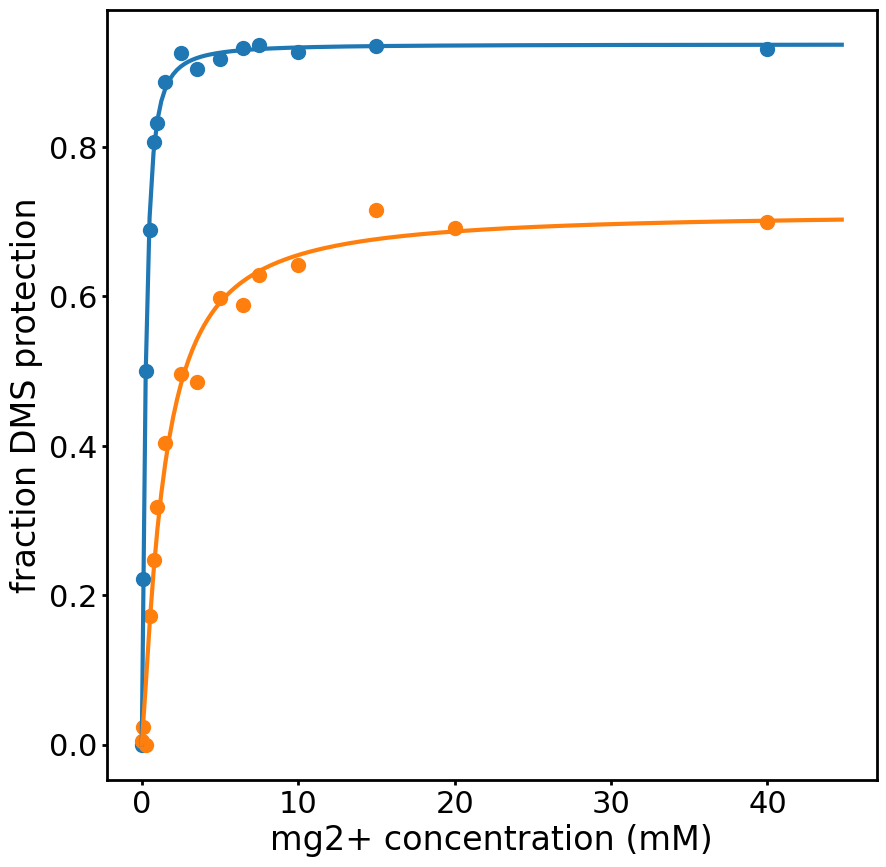

In [31]:
fig, ax = plt.subplots()
pfit, perr = compute_mg_1_2(df_wt["mg_conc"], df_wt["gaaa_avg"])
plot_mg_titration_fit(df_wt["mg_conc"], df_wt["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
pfit, perr = compute_mg_1_2(df_h2_longer["mg_conc"], df_h2_longer["gaaa_avg"])
plot_mg_titration_fit(df_h2_longer["mg_conc"], df_h2_longer["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)

[0.22858229 1.43902896 0.93716014]
[0.58291745 1.3810599  0.87483143]


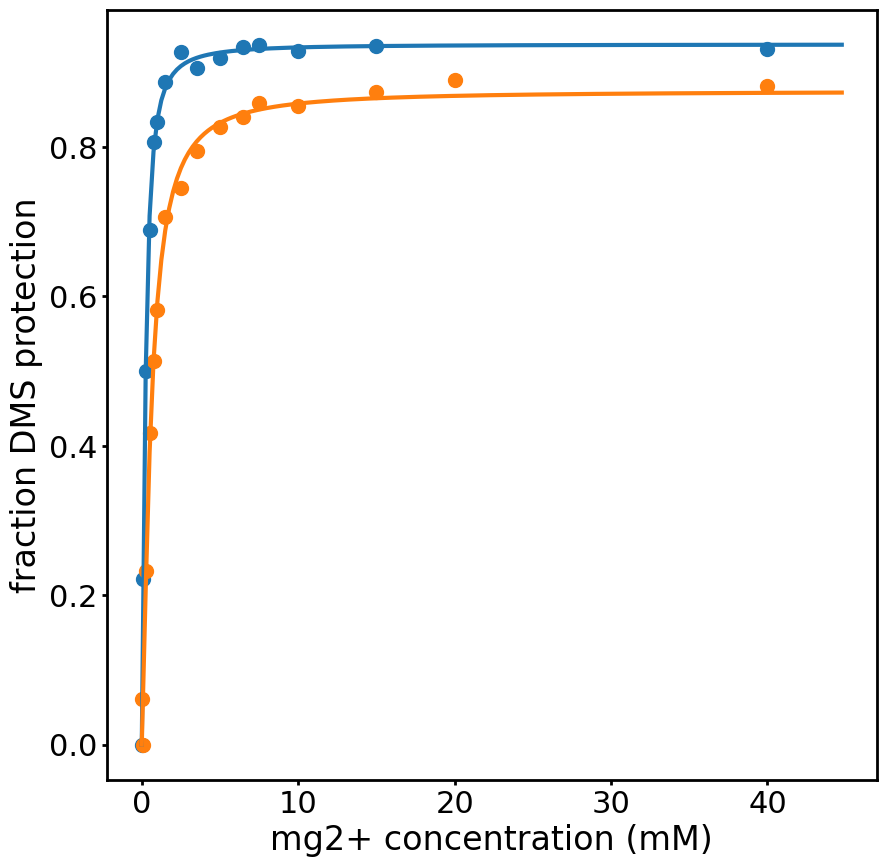

In [32]:
fig, ax = plt.subplots()
pfit, perr = compute_mg_1_2(df_wt["mg_conc"], df_wt["gaaa_avg"])
plot_mg_titration_fit(df_wt["mg_conc"], df_wt["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
pfit, perr = compute_mg_1_2(df_h3_longer["mg_conc"], df_h3_longer["gaaa_avg"])
plot_mg_titration_fit(df_h3_longer["mg_conc"], df_h3_longer["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)